In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers


input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


Using TensorFlow backend.


In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.3232 - val_loss: 0.2653
Epoch 2/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.2553 - val_loss: 0.2462
Epoch 3/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.2342 - val_loss: 0.2219
Epoch 4/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.2149 - val_loss: 0.2031
Epoch 5/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1971 - val_loss: 0.1903
Epoch 6/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1877 - val_loss: 0.1834
Epoch 7/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1822 - val_loss: 0.1773
Epoch 8/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1759 - val_loss: 0.1723
Epoch 9/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1694 - val_loss: 0.1

60000/60000 [==============================] - 3s 50us/step - loss: 0.1038 - val_loss: 0.1029
Epoch 78/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1036 - val_loss: 0.1033
Epoch 79/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1036 - val_loss: 0.1027
Epoch 80/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1033 - val_loss: 0.1019
Epoch 81/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1030 - val_loss: 0.1034
Epoch 82/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1028 - val_loss: 0.1040
Epoch 83/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1027 - val_loss: 0.1011
Epoch 84/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1024 - val_loss: 0.1027
Epoch 85/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1022 - val_loss: 0.1014
Epoch 86/100
60000/60000 [========================

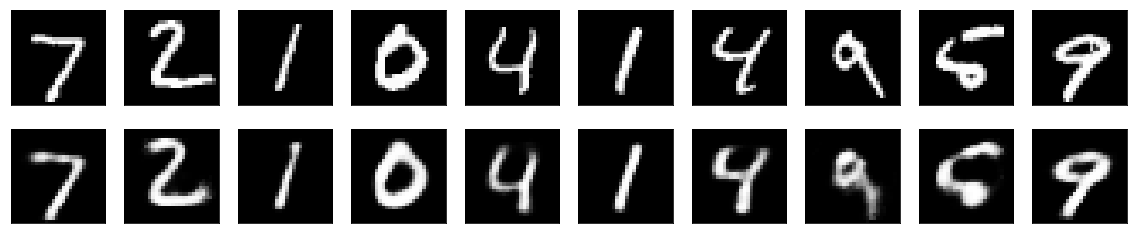

In [12]:
decoded_imgs=autoencoder.predict(x_test)

%matplotlib inline
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()